In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import base_style
sns.set_style("white", base_style.base_style)
sns.set_context("talk", font_scale=1.5)

# MDF imports
#from mdf_dataworks.toolbox import login
from mdf_forge import forge

# Perform search by source

In [2]:
source = "oqmd"

mdf = forge.Forge()
res = mdf.match_sources(source).search(limit=10000)

# Combine results into a Dataframe

In [3]:
stability_gap = [(r.get("mdf").get("composition"), 
                  r.get("oqmd",{}).get("stability", {}).get("value"),
                  r.get("oqmd",{}).get("band_gap", {}).get("value")) for r in res]
df = pd.DataFrame(stability_gap, columns=["composition","stability","band_gap"]).dropna()
df = df.dropna()
df.head(20)

,composition,stability,band_gap
0,Te3U1,0.261648,0.000
1,Cs3Pd1,0.241725,0.000
6,Br3Np1,0.422719,0.369
7,Ag3As1,0.124531,0.000
9,Ag1P3,0.748293,0.000
11,Os3V1,0.080220,0.000
12,Br3Hf1,0.855093,0.000
13,Ce1In3,0.124162,0.000
14,Cs3Ge1,0.305651,0.000
18,Pb3Rb1,0.142274,0.000


# Plot results

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


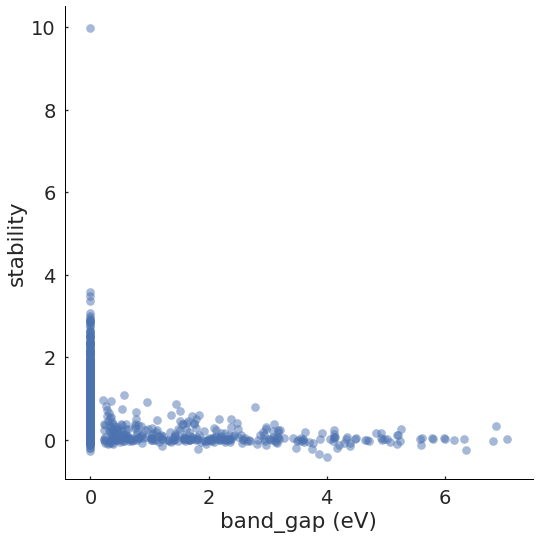

In [4]:
pal = sns.color_palette("muted")

x_col = "band_gap"
y_col = "stability"

# Make plot
g = sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=False, size=8, 
                               scatter_kws={"s": 75, "alpha": 0.5})
# Set axis labels
g.set_axis_labels(x_col + " (eV)", y_col)